In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

# Problem 2

*Write a recursive variable step size integrator like the one we wrote in class that does not call f(x) multiple times for the same x. The function prototype should be "def integrate_adaptive(fun,a,b,tol,extra=None)" where extra contains information a sub-call needs from preceeding calls. On the initial call, extra should be None so the integrator knows it's starting. For a few typical examples, how many function calls do you save vs. the lazy way we wrote it in class?*

The function "integrate_adaptive" uses some of the same code as "integrate" from "integrate_adaptive_class.py". 

Here, integrate_adaptive saves the number of times it's called with "integrate_step.calls". The first call saves x and y=f(x) values, then all following calls save x and y and go through past values when evaluating y=f(x) to see if they exist already.

The function "test_fun" counts the number of f(x) calls.

f(x) is called 5 times within x from a to b so I wanted to sanity check that if some number of f(x) had already been evaluated then f(x) would be called less than 5 times. I use "test_fun.subcounter" to check this. 

"test_fun.counter" counts the number of times f(x) is called in total. The total number of f(x) calls would be 5$*$(number of integrate_adaptive calls) with the way the code was written in class.

In [2]:
# Define another function to check integrate_step with
def xexp(x):
    return x*np.exp(-x)

# Define a function that counts the number of times it's called
def test_fun(x,fun):
    test_fun.subcounter+=1
    test_fun.counter+=1
    
    y = fun(x)
    return y

# Define the adaptive integrator
def integrate_adaptive(fun,a,b,tol):
    """
    Parameters:
    fun = function (the integrand)
    a = lower limit of the integral
    b = upper limit of the integral
    tol = tolerance to decide whether to evaluate the 3 point integral on a smaller interval
    
    Returns:
    integral of fun(x) from a to b
    """
    
    #print('calling function from ',a,b) # from class
    
    # Count the number of integrate_adaptive calls
    integrate_adaptive.calls += 1
    
    # Set x from a to b and set dx
    x=np.linspace(a,b,5)
    dx=x[1]-x[0]
    
    # Evaluate y for the first call
    if integrate_adaptive.calls == 1:
        test_fun.subcounter=0 # for the sanity check
        y=np.zeros(len(x))
        for i in range(len(x)):
            y[i] = fun(x[i])
        #print('called fun {} times with x0'.format(test_fun.subcounter)) # sanity check
    
        # Append x, y values to integrate_adaptive
        integrate_adaptive.x_vals+=[x]
        integrate_adaptive.y_vals+=[y]
        
        # Save x, y values to integrate_adaptive and remove repeats
        x_past = np.unique(integrate_adaptive.x_vals)
        y_past = np.unique(integrate_adaptive.y_vals)
        #print('x past = ', x_past) # sanity check
        
    # Evaluate y = f(x) for new x values only for all following calls
    elif integrate_adaptive.calls > 1:

        # Past x, y values with repeats removed
        x_past = np.unique(integrate_adaptive.x_vals)
        y_past = np.unique(integrate_adaptive.y_vals)
        
        # Find the indices of where past x values intersect with current x values
        x_past_x = set(list(x)).intersection(list(x_past))
        ind_past = [list(x_past).index(X) for X in x_past_x]
        ind = [list(x).index(X) for X in x_past_x]
        #print('ind past = {}, ind = {}'.format(ind_past,ind)) # sanity check
        
        # Fill current y with past y values AND evaluate y=f(x) for new x values only
        y = np.zeros(len(x))
        test_fun.subcounter=0 # for the sanity check
        for i in range(len(x)):
            if i in ind_past:
                y[ind] = y_past[ind_past]
            else:
                y[i] = fun(x[i])
        #print('called fun {} times with x1'.format(test_fun.subcounter)) # sanity check
        
        # Append x, y values to integrate_adaptive
        integrate_adaptive.x_vals+=[x]
        integrate_adaptive.y_vals+=[y]
    
    # 3-point integral from class
    i1=(y[0]+4*y[2]+y[4])/3*(2*dx)
    i2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx
    myerr=np.abs(i1-i2)
    if myerr<tol:
        return i2
    else:
        mid=(a+b)/2
        int1=integrate_adaptive(fun,a,mid,tol/2)
        int2=integrate_adaptive(fun,mid,b,tol/2)
        return int1+int2

Test for 3 functions: exp(x), x$*$exp(x), cos(x).

In [3]:
# exp(x)

# initialize integrate_adaptive calls and function calls
integrate_adaptive.calls=0
test_fun.counter=0

# initialize x and y values
integrate_adaptive.x_vals, integrate_adaptive.y_vals=[],[]

# use exp(x), put it in test_fun to count function calls
int_fun = lambda x: test_fun(x, np.exp)

# evaluate the integral (limits, tol are the same as in class)
ans=integrate_adaptive(int_fun,-4,6,1e-6)

print('f(x) was called {} times. integrate_step was called {} times.'.format(test_fun.counter, integrate_adaptive.calls))
print('Since there are 5 points between a and b, the integrator from class would have called f(x) {} times'.format(5*integrate_adaptive.calls))
print('So f(x) was called around {}% less with this method'.format(int((5*integrate_adaptive.calls-test_fun.counter)*100/(5*integrate_adaptive.calls))))

f(x) was called 2159 times. integrate_step was called 465 times.
Since there are 5 points between a and b, the integrator from class would have called f(x) 2325 times
So f(x) was called around 7% less with this method


In [4]:
# x*exp(x)

# initialize integrate_adaptive calls and function calls
integrate_adaptive.calls=0
test_fun.counter=0

# initialize x and y values
integrate_adaptive.x_vals, integrate_adaptive.y_vals=[],[]

# use x*exp(x), put it in test_fun to count function calls
int_fun = lambda x: test_fun(x, xexp)

# evaluate the integral (limits, tol are the same as in class)
ans=integrate_adaptive(int_fun,-4,6,1e-6)

print('f(x) was called {} times. integrate_step was called {} times.'.format(test_fun.counter, integrate_adaptive.calls))
print('Since there are 5 points between a and b, the integrator from class would have called f(x) {} times'.format(5*integrate_adaptive.calls))
print('So f(x) was called around {}% less with this method'.format(int((5*integrate_adaptive.calls-test_fun.counter)*100/(5*integrate_adaptive.calls))))

f(x) was called 1899 times. integrate_step was called 413 times.
Since there are 5 points between a and b, the integrator from class would have called f(x) 2065 times
So f(x) was called around 8% less with this method


In [5]:
# cos(x)

# initialize integrate_adaptive calls and function calls
integrate_adaptive.calls=0
test_fun.counter=0

# initialize x and y values
integrate_adaptive.x_vals, integrate_adaptive.y_vals=[],[]

# use cos(x), put it in test_fun to count function calls
int_fun = lambda x: test_fun(x, np.cos)

# evaluate the integral (limits, tol are the same as in class)
ans=integrate_adaptive(int_fun,-4,6,1e-6)

print('f(x) was called {} times. integrate_step was called {} times.'.format(test_fun.counter, integrate_adaptive.calls))
print('Since there are 5 points between a and b, the integrator from class would have called f(x) {} times'.format(5*integrate_adaptive.calls))
print('So f(x) was called around {}% less with this method'.format(int((5*integrate_adaptive.calls-test_fun.counter)*100/(5*integrate_adaptive.calls))))

f(x) was called 1369 times. integrate_step was called 307 times.
Since there are 5 points between a and b, the integrator from class would have called f(x) 1535 times
So f(x) was called around 10% less with this method


# Problem 1 

*Electric field $E$ from an infinitesimally thin spherical shell of charge with radius $R$ comes from working out the field from a ring along its central axis and integrating those rings to form a spherical shell. Use both your integrator and scipy.integrate.quad to plot $E=E(z)$, $z$ is the distance from the center of the sphere. Make sure plot covers regions with $X < R$ and $z > R$ and $z=R$. Is there a singularity in the integral, does quad care, does integrator?*

Solution to Griffiths problem 2.7: 

The electric field is in the z-direction, the integral is set up as: 

$E(z) = \frac{1}{4 \pi \epsilon_0} \int_0^1 \frac{\sigma R^2 sin \theta d \theta d\phi (z- R cos \theta)}{(R^2 + z^2 - 2Rz cos \theta) ^{3/2} } = \frac{2 \pi R^2 \sigma}{4 \pi \epsilon_0} \int_{-1}^{+1} \frac{z - Ru}{(R^2 + z^2 - 2Rzu)^{3/2}}du$ where $u = cos \theta$, $du = -sin \theta$, and $\sigma$ is the charge density of the spherical shell.

Forget about the constants (set the fraction in front of the intergral to be 1, set R=1). Then $E(z) = \int_{-1}^{+1} \frac{z - u}{(1 + z^2 - 2zu)^{3/2}}du$.

The analytical result is then $E(z) \propto 0$ for $z<R$ and $E(z) \propto 1/z^2$ for $z>R$.

Note: I didn't write anything in my integrator from problem 2 to deal with the singularity at z=R (it just ran until I got an error for maximum recursion). So I decided to take z values greater than and less than R and evaluate the integral there.

In [6]:
# # set u, evaluate integral from -1 to 1
npts = 101
u0, u1 = -1,1
u_ = np.linspace(u0,u1,npts)

# set z, take values from 0 to 2 (R=1 at midpoint)
z_ = np.linspace(0,2,npts+100) # more z values than u values because why not
# print to make sure z is evaluated at z=R
if z_[z_==1]==1:
    print('quad evaluated z at z=R=1')

# set another z, this time excluding z=R=1
z_new = np.array(list(z_[z_<1]) + list(z_[z_>1]))

# evaluate the integral using integrate_adaptive
Int = []
for i in range(len(z_new)):

    # initialize integrate_adaptive calls
    integrate_adaptive.calls=0

    # initialize x and y values
    integrate_adaptive.x_vals, integrate_adaptive.y_vals=[],[]

    # integrand (function of u for each z value)
    integrand = lambda u: (z_new[i] - u)/(1 + z_new[i]**2 - 2*z_new[i]*u)**1.5
    
    # evaluate the integral from u (-1 to 1)
    ans=integrate_adaptive(integrand,-1,1,1e-6)
    Int.append(ans)

# evaluate the integral using integrate.quad
QuadInt = []
for i in range(len(z_)):
    
    # integrand (function of u for z values that include z=R=1)
    integrand = lambda u: (z_[i] - u)/(1 + z_[i]**2 - 2*z_[i]*u)**1.5
    
    quadint = integrate.quad(integrand, -1, 1)[0]
    QuadInt.append(quadint)

quad evaluated z at z=R=1


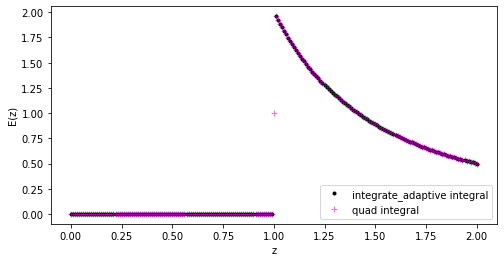

In [7]:
# plot the results
plt.figure(figsize=(8,4))
plt.plot(z_new, Int, ls='', marker='.', c='k', label='integrate_adaptive integral')
plt.plot(z_, QuadInt, ls='', marker='+', alpha=0.5, c='m', label='quad integral')
plt.legend(loc='lower right')
plt.ylabel('E(z)')
plt.xlabel('z')
plt.savefig('problem1.png')

Fig: The quadratic integral follows the analytical result, and doesn't seem to care about the singularity at $z=R$. My integral will fail if it's given $z=R$, I think this is because it will keep halving the interval (a,b) to do the 3-point integral and never reach the desired tolerance. 

# Problem 3

*Write a function that models the log base 2 of x valid from 0.5 to 1 to an accuracy in the region better than 1e-6. Use a truncated Chebyshev polynomial fit (np.polynomical.chebyshev.chebfit. How many polynomials do you need? Use many x/y values and fit to high order, then only keep the terms you think you'll need. Rescale x-range to go from -1 to 1 before calling chebfit.*

*Write a routine called "mylog2" that will take the natural log of any positive number. Hint: use np.frexp, which breaks up a floating point number into its mantissa and exponent. Having the routine natively produce log base 2 will simplify life. Can use np.polynomial.chebyshev.chebval to evaluate the fit.*

In [8]:
def chebfit_log2(x,y,tol=1e-6):
    """
    Parameters:
    x = x values, not rescaled for chebfit
    y = log2(x), to model Chebyshev to
    tol = tolerance for accuracy. This decides the number of terms for the Chebyshev model
    
    Returns:
    cheb_truncated = coefficients of truncated Chebyshev fit to log2(x)
    cheb_eval = Chebyshev model evaluated at x
    """

    # rescale x for chebfit
    x_rescale = 4*(x-0.75)

    # Get Chebyshev polynomials, take 25 to start
    order = 25
    cheb_full = np.polynomial.chebyshev.chebfit(x_rescale, y, order)

    # Starting at 2 coefficients, evaluate the Chebyshev model and check
    # the mean absolute difference between that and log2(x). If it's greater
    # than the tolerance (1e-6) then evaluate with more terms. Stop when
    # the model is accurate enough
    cheb_coeffs = [None]
    for i in range(1,order):
        cheb_model = np.polynomial.chebyshev.chebval(x_rescale, cheb_full[0:i])
        if np.mean(np.abs(cheb_model - y)) > tol:
            print('{} coefficients are not accurate enough'.format(i+1))
        else:
            print('{} coefficients give an accuracy of {}'.format(i+1,tol))
            cheb_coeffs = cheb_full[0:i]
            break

    # Truncated Chebyshev coefficients
    cheb_truncated = np.array(cheb_coeffs)

    # Evaluate the Chebyshev fit
    cheb_eval = np.polynomial.chebyshev.chebval(x_rescale, cheb_truncated)
    
    return cheb_truncated, cheb_eval

2 coefficients are not accurate enough
3 coefficients are not accurate enough
4 coefficients are not accurate enough
5 coefficients are not accurate enough
6 coefficients are not accurate enough
7 coefficients are not accurate enough
8 coefficients are not accurate enough
9 coefficients give an accuracy of 1e-06


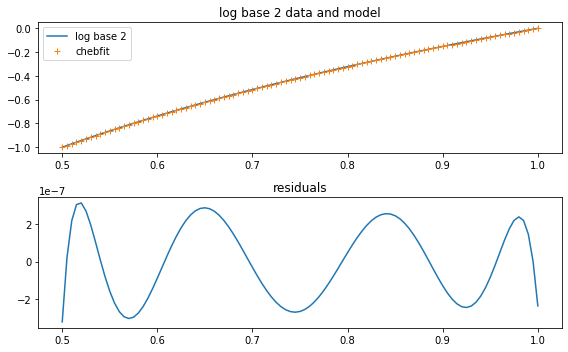

In [9]:
# Get the truncated Chebyshev polynomial fit to log base 2 of x

# log2(x) for x from 0.5 to 1
npts = 101
x0,x1 = 0.5, 1 
x = np.linspace(x0,x1,npts)
y = np.log2(x)

# use function to get the model
cheb_truncated, cheb_eval = chebfit_log2(x,y)

# plot the results
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,5),tight_layout=True)
ax1.set_title('log base 2 data and model')
ax1.plot(x, y, label='log base 2')
ax1.plot(x, cheb_eval, ls='', marker='+', label='chebfit')
ax1.legend()
ax2.set_title('residuals')
ax2.plot(x,y-cheb_eval)
fig.savefig('problem3_cheb_log2x.png')

Fig: The Chebyshev model is accurate to better than 1e-6.

frexp(x) breaks up a number x into its mantissa and exponenet (x = mantissa$*$2^exponent). Here the mantissa range is from 0.5 to 1 so can use the above function to evaluate $ln(x)$.

$log_2(x) = \frac{ln(x)}{ln(2)}$ so $ln(x) = log_2(x)ln(2) $

If $x=m*2^{\alpha}$, then $ln(x) = ln(m) + \alpha ln(2) = log_2(m)ln(2) + \alpha ln(2)$

In [10]:
def mylog2(x,tol=1e-6):
    """
    Parameters:
    x = any positive number
    tol = tolerance for accuracy. This decides the number of terms for the Chebyshev model
    
    Returns:
    lnx = natural log of x evaluated using Chebyshev model to log2(x)
    """
    
    # Break up x into its mantissa and exponenet:
    m,alpha = np.frexp(x)
    
    # Use previous function to get a truncated Chebyshev 
    # fit to x between 0.5 and 1. 
    npts = 101
    x0,x1 = 0.5, 1 
    x = np.linspace(x0,x1,npts)
    y = np.log2(x)
    cheb_truncated, cheb_eval = chebfit_log2(x,y,tol)
    
    # Evaluate to get log base 2 of m (rescale m first to 
    # use the Chebyshev model)
    m_rescale = 4*(m-0.75)
    cheb_m = np.polynomial.chebyshev.chebval(m_rescale, cheb_truncated)
    
    # Natural log of x is ln(x) = ln(2)*(log2(m) + alpha)
    lnx = np.log(2)*(cheb_m + alpha)
    
    return lnx

2 coefficients are not accurate enough
3 coefficients are not accurate enough
4 coefficients are not accurate enough
5 coefficients are not accurate enough
6 coefficients are not accurate enough
7 coefficients are not accurate enough
8 coefficients are not accurate enough
9 coefficients are not accurate enough
10 coefficients are not accurate enough
11 coefficients are not accurate enough
12 coefficients are not accurate enough
13 coefficients are not accurate enough
14 coefficients give an accuracy of 1e-10


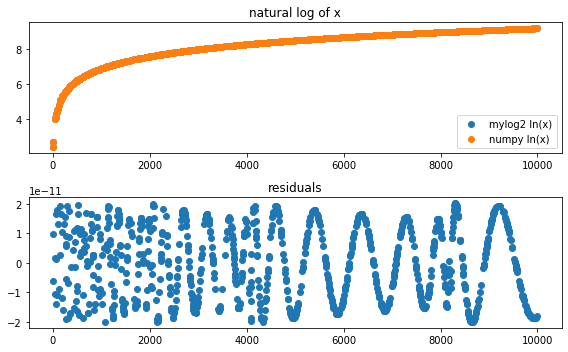

In [11]:
# Test function with some random x values and plot

# get random x values 
test_x = np.random.randint(1,100000,size=1000)/10

# use mylog2 to evaluate 
fit_lnx = mylog2(test_x, tol=1e-10)

# use numpy to evaluate
np_lnx = np.log(test_x)

# plot results
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,5),tight_layout=True)
ax1.plot(test_x, fit_lnx, ls='', marker='o', label='mylog2 ln(x)')
ax1.plot(test_x, np_lnx, ls='', marker='o', label='numpy ln(x)')
ax1.set_title('natural log of x')
ax1.legend()
ax2.plot(test_x, np_lnx-fit_lnx, ls='', marker='o')
ax2.set_title('residuals')
fig.savefig('problem3_cheb_lnx.png')

Fig: I changed the tolerance to 1e-10 and it looks like the accuracy from the Chebyshev model is close to the difference between using np.log(x) vs. using mylog2(x).